In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt




In [5]:
# Verileri yükleme
with open('/Users/kaandandin/Desktop/odev/StreamingHistory.json', 'r') as f:
    streaming_history = json.load(f)

with open('/Users/kaandandin/Desktop/odev/IstWeatherData.json', 'r') as f:
    weather_data = json.load(f)

In [6]:
# Streaming verisini DataFrame'e çevirme
streaming_df = pd.DataFrame(streaming_history)

# Tarihi ayıklama ve playtime'a göre grup oluşturma
streaming_df['date'] = pd.to_datetime(streaming_df['endTime']).dt.date
artist_playtime = streaming_df.groupby(['date', 'artistName']).agg({'msPlayed': 'sum'}).reset_index()

# Hava durumu verisini DataFrame'e çevirme
weather_days = weather_data.get('days', [])
weather_df = pd.DataFrame(weather_days)
weather_df['datetime'] = pd.to_datetime(weather_df['datetime']).dt.date

# İki tabloyu tarihe göre birleştirme
merged_df = pd.merge(artist_playtime, weather_df[['datetime', 'conditions']], 
                     left_on='date', right_on='datetime', how='inner')

# Hava durumuna göre en çok dinlenen sanatçıları bulma
top_artists_by_weather = merged_df.groupby(['conditions', 'artistName']).agg({'msPlayed': 'sum'}).reset_index()
top_artists_by_weather = top_artists_by_weather.sort_values(['conditions', 'msPlayed'], ascending=[True, False])

# Her hava durumu için ilk 5 sanatçıyı seçme
top_artists_by_weather = top_artists_by_weather.groupby('conditions').head(5)

# Sonuçları yazdırma
print(top_artists_by_weather)

# İsteğe bağlı: CSV'ye kaydetme
top_artists_by_weather.to_csv('Top_Artists_By_Weather.csv', index=False)


                  conditions            artistName  msPlayed
417                    Clear            Sezen Aksu   4397059
460                    Clear            The Weeknd   2853149
13                     Clear       Ahmet Hatipoğlu   2420984
363                    Clear           Pilli Bebek   2051231
491                    Clear                 Yalın   1902068
842         Partially cloudy            Sezen Aksu   4508765
595         Partially cloudy           Central Cee   3969318
659         Partially cloudy       Frédéric Chopin   1903353
812         Partially cloudy                 Quavo   1874386
895         Partially cloudy                 Yalın   1803661
1298  Rain, Partially cloudy                 Yalın   4320158
1299  Rain, Partially cloudy                 Yaşar   3509979
1244  Rain, Partially cloudy            Sezen Aksu   2498592
1017  Rain, Partially cloudy  Dolu Kadehi Ters Tut   2247197
1045  Rain, Partially cloudy         Ferdi Özbeğen   2245862


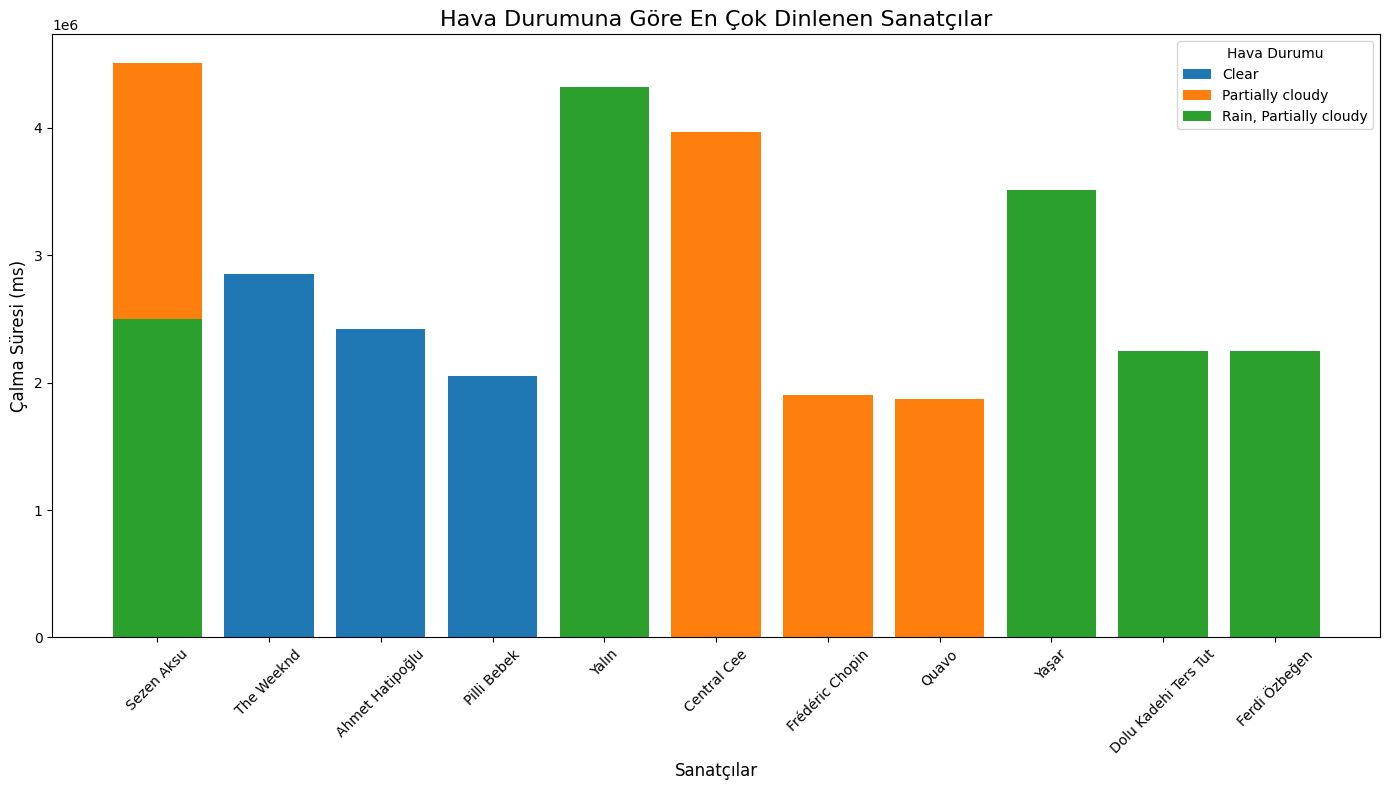

In [7]:
# Grafiği oluşturma
plt.figure(figsize=(14, 8))

# Hava durumu kategorilerine göre döngü
conditions = top_artists_by_weather['conditions'].unique()
for condition in conditions:
    condition_data = top_artists_by_weather[top_artists_by_weather['conditions'] == condition]
    plt.bar(
        condition_data['artistName'], 
        condition_data['msPlayed'], 
        label=condition
    )

# Grafik detayları
plt.title('Hava Durumuna Göre En Çok Dinlenen Sanatçılar', fontsize=16)
plt.xlabel('Sanatçılar', fontsize=12)
plt.ylabel('Çalma Süresi (ms)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hava Durumu')
plt.tight_layout()

# Grafiği gösterme
plt.show()

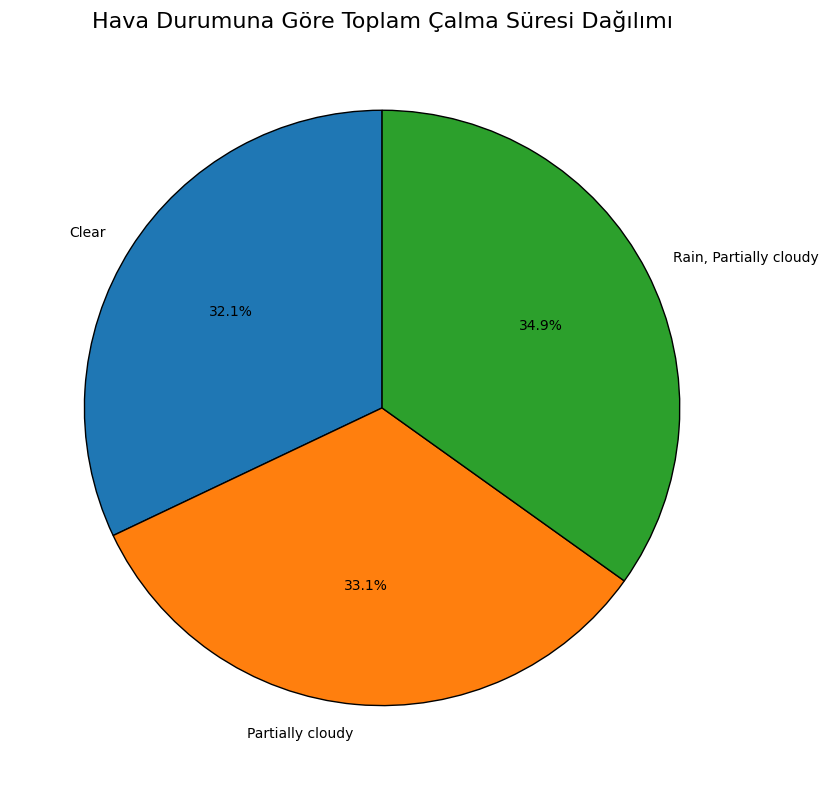

In [8]:
import matplotlib.pyplot as plt

# Hava durumuna göre toplam çalma sürelerini hesaplama
condition_playtime = top_artists_by_weather.groupby('conditions')['msPlayed'].sum()

# Pasta grafiği oluşturma
plt.figure(figsize=(10, 8))
plt.pie(
    condition_playtime, 
    labels=condition_playtime.index, 
    autopct='%1.1f%%', 
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

# Grafik detayları
plt.title('Hava Durumuna Göre Toplam Çalma Süresi Dağılımı', fontsize=16)
plt.tight_layout()

# Grafiği gösterme
plt.show()

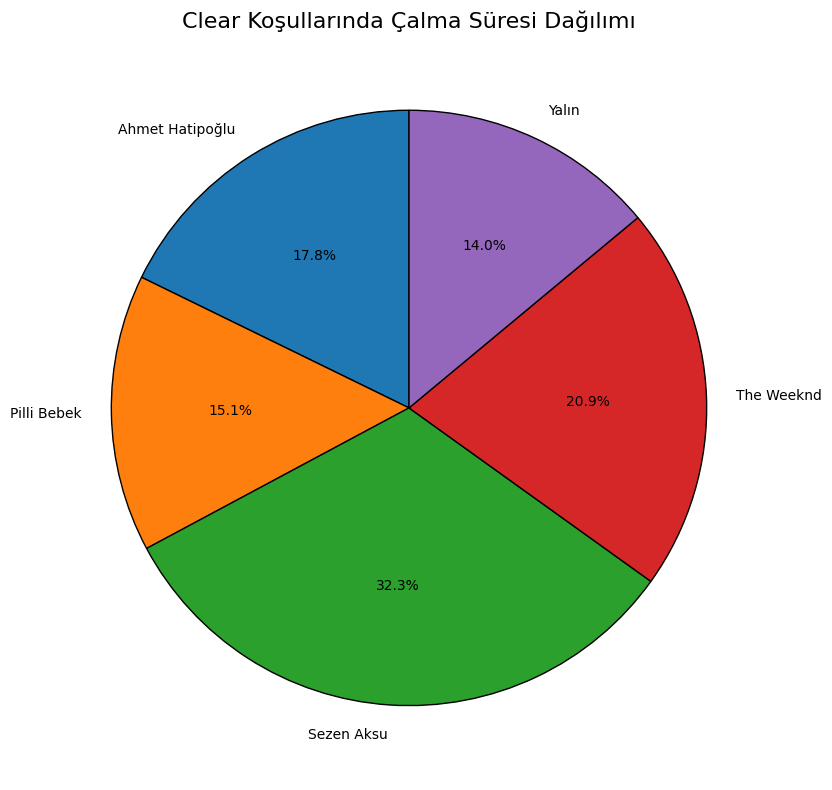

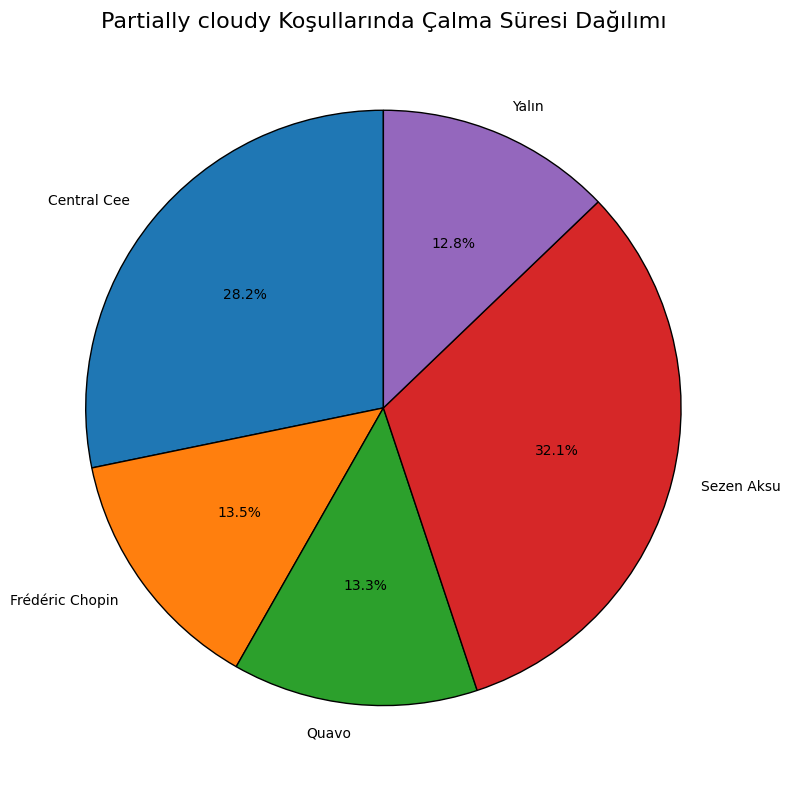

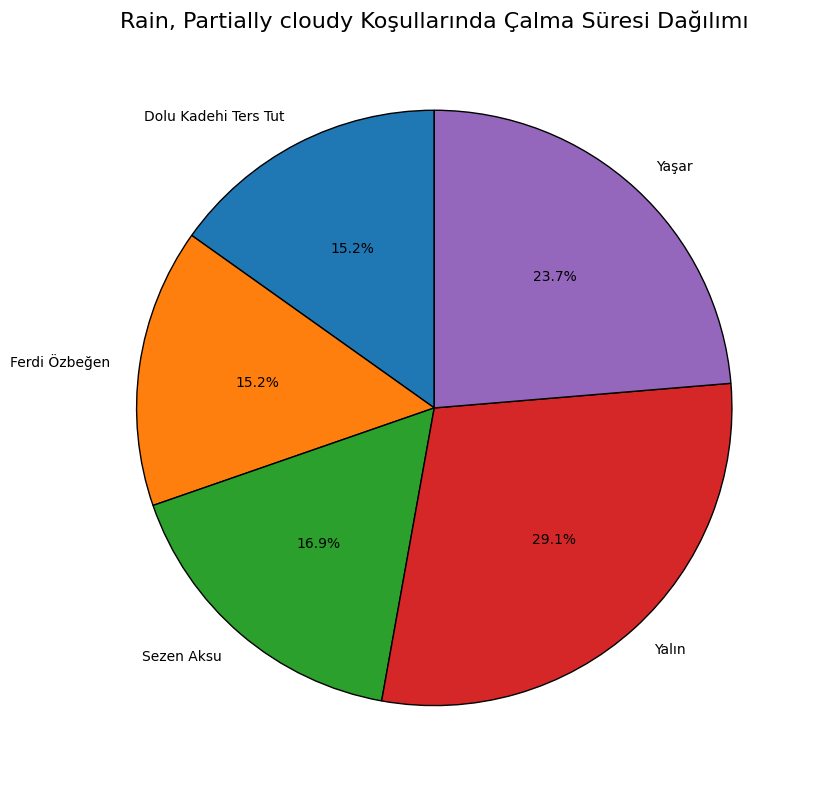

In [9]:
import matplotlib.pyplot as plt

# Hava durumuna ve sanatçılara göre toplam çalma sürelerini hesaplama
condition_artist_playtime = top_artists_by_weather.groupby(['conditions', 'artistName'])['msPlayed'].sum().reset_index()

# Her hava durumu için pasta grafiği çizme
unique_conditions = condition_artist_playtime['conditions'].unique()

for condition in unique_conditions:
    condition_data = condition_artist_playtime[condition_artist_playtime['conditions'] == condition]
    
    # Veriler
    labels = condition_data['artistName']
    sizes = condition_data['msPlayed']
    
    # Pasta grafiği
    plt.figure(figsize=(10, 8))
    plt.pie(
        sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
    )
    
    # Başlık
    plt.title(f'{condition} Koşullarında Çalma Süresi Dağılımı', fontsize=16)
    plt.tight_layout()
    
    # Grafiği göster
    plt.show()

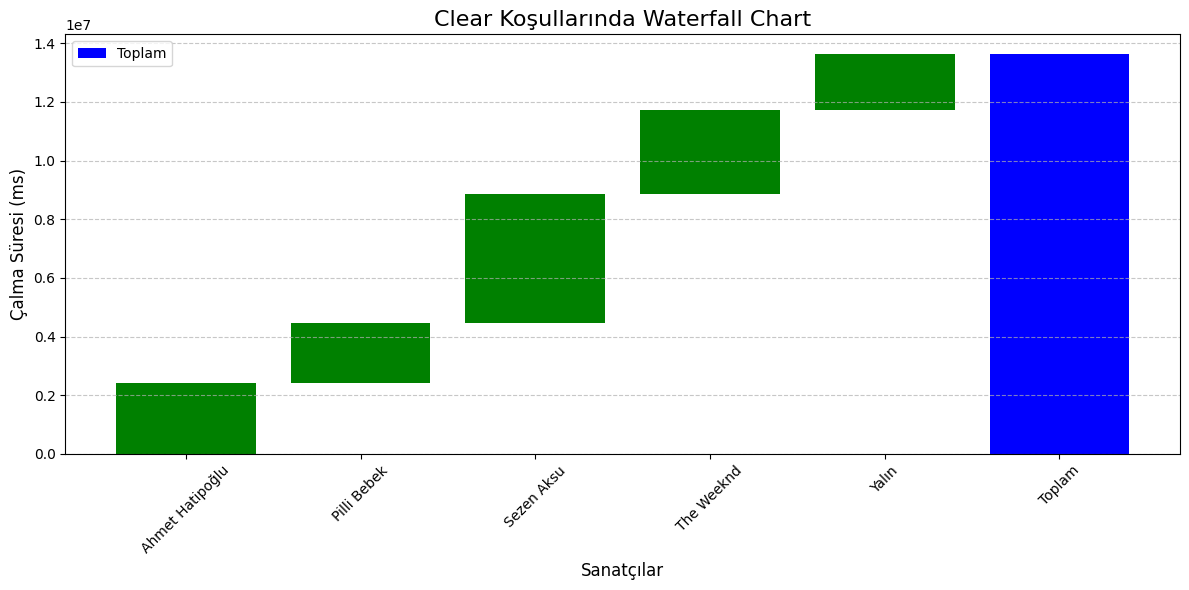

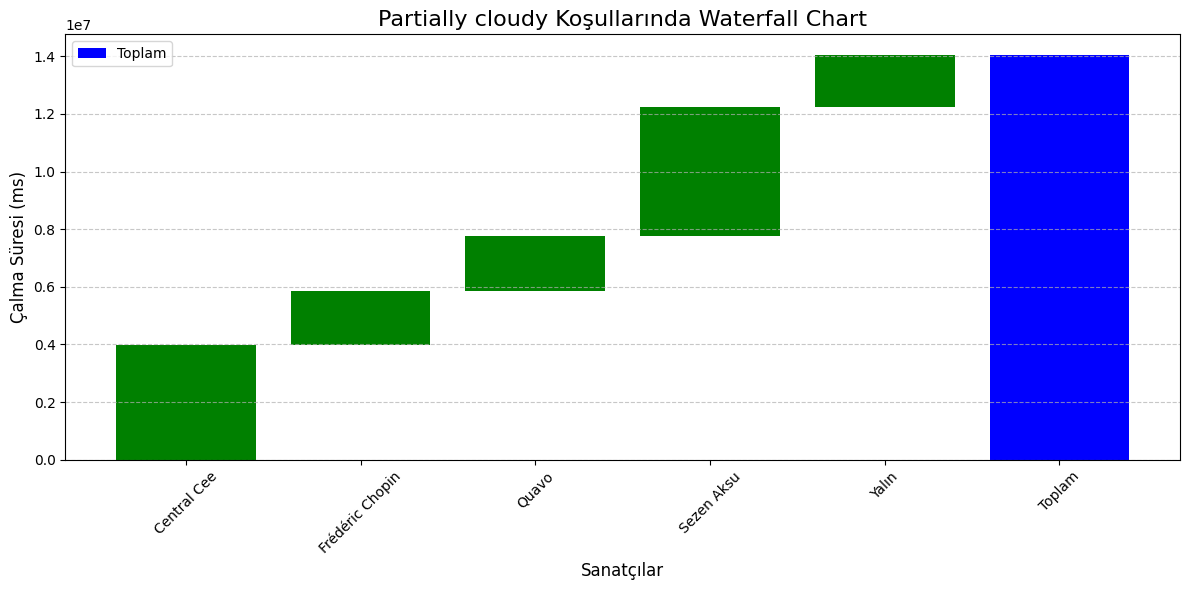

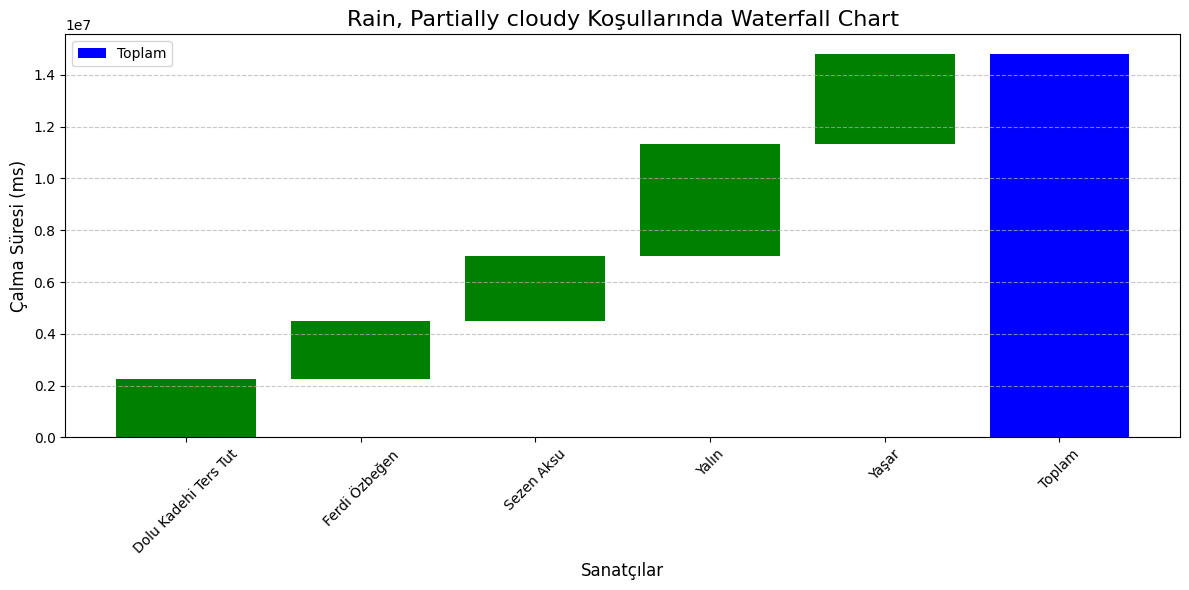

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Hava durumu ve sanatçılara göre toplam çalma sürelerini hesaplama
condition_artist_playtime = top_artists_by_weather.groupby(['conditions', 'artistName'])['msPlayed'].sum().reset_index()

# Her hava durumu için waterfall chart oluşturma
unique_conditions = condition_artist_playtime['conditions'].unique()

for condition in unique_conditions:
    condition_data = condition_artist_playtime[condition_artist_playtime['conditions'] == condition]
    
    # Verileri hazırlama
    labels = condition_data['artistName'].tolist() + ['Toplam']
    values = condition_data['msPlayed'].tolist()
    total_value = sum(values)
    values.append(total_value)

    # Yığınların hesaplanması
    changes = np.array(values)
    running_total = np.cumsum(values[:-1])
    starts = np.insert(running_total[:-1], 0, 0)

    # Waterfall chart çizimi
    plt.figure(figsize=(12, 6))
    for i in range(len(values) - 1):
        color = 'green' if values[i] > 0 else 'red'
        plt.bar(labels[i], values[i], bottom=starts[i], color=color)

    # Toplam değeri ayrı renkle göster
    plt.bar(labels[-1], total_value, color='blue', label='Toplam')

    # Grafik detayları
    plt.title(f'{condition} Koşullarında Waterfall Chart', fontsize=16)
    plt.ylabel('Çalma Süresi (ms)', fontsize=12)
    plt.xlabel('Sanatçılar', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.legend()

    # Grafiği gösterme
    plt.show()


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hava durumu ve sanatçılara göre toplam çalma sürelerini hesaplama
condition_artist_playtime = top_artists_by_weather.groupby(['conditions', 'artistName'])['msPlayed'].sum().reset_index()

# Scatter Chart oluşturma
plt.figure(figsize=(12, 8))

# Renkleri hava durumu kategorilerine göre belirleme
unique_conditions = condition_artist_playtime['conditions'].unique()
palette = sns.color_palette("hsv", len(unique_conditions))
condition_colors = dict(zip(unique_conditions, palette))

# Scatter plot çizimi
for condition in unique_conditions:
    condition_data = condition_artist_playtime[condition_artist_playtime['conditions'] == condition]
    plt.scatter(
        condition_data['artistName'], 
        condition_data['msPlayed'], 
        label=condition, 
        color=condition_colors[condition],
        alpha=0.7,
        s=100  # Nokta büyüklüğü
    )

# Grafik detayları
plt.title('Hava Durumuna Göre Sanatçıların Çalma Süresi (Scatter Chart)', fontsize=16)
plt.xlabel('Sanatçılar', fontsize=12)
plt.ylabel('Çalma Süresi (ms)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hava Durumu', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Grafiği gösterme
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Hava durumu ve sanatçılara göre toplam çalma sürelerini hesaplama
condition_artist_playtime = top_artists_by_weather.groupby(['conditions', 'artistName'])['msPlayed'].sum().reset_index()

# Benzersiz sanatçıları ve hava durumlarını belirleme
artists = condition_artist_playtime['artistName'].unique()
conditions = condition_artist_playtime['conditions'].unique()

# Bar pozisyonlarını ayarlama
bar_width = 0.2
x_indexes = np.arange(len(artists))
colors = plt.cm.tab10(np.linspace(0, 1, len(conditions)))

# Sütun grafiği oluşturma
plt.figure(figsize=(14, 8))

for i, condition in enumerate(conditions):
    condition_data = condition_artist_playtime[condition_artist_playtime['conditions'] == condition]
    y_values = []
    
    for artist in artists:
        value = condition_data[condition_data['artistName'] == artist]['msPlayed'].sum()
        y_values.append(value if not np.isnan(value) else 0)

    plt.bar(
        x_indexes + i * bar_width, 
        y_values, 
        width=bar_width, 
        label=condition, 
        color=colors[i]
    )

# Grafik detayları
plt.title('Hava Durumuna Göre Sanatçıların Çalma Süresi (Column Chart)', fontsize=16)
plt.xlabel('Sanatçılar', fontsize=12)
plt.ylabel('Çalma Süresi (ms)', fontsize=12)
plt.xticks(ticks=x_indexes + bar_width * (len(conditions) / 2 - 0.5), labels=artists, rotation=45)
plt.legend(title='Hava Durumu', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Grafiği gösterme
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Hava durumu ve sanatçılara göre toplam çalma sürelerini hesaplama
condition_artist_playtime = top_artists_by_weather.groupby(['artistName', 'conditions'])['msPlayed'].sum().unstack(fill_value=0)

# Sanatçılar ve hava durumu kategorilerini belirleme
artists = condition_artist_playtime.index
conditions = condition_artist_playtime.columns

# Yığın sütun grafiği oluşturma
plt.figure(figsize=(14, 8))

bottom_values = np.zeros(len(artists))

for condition in conditions:
    plt.bar(
        artists, 
        condition_artist_playtime[condition], 
        bottom=bottom_values, 
        label=condition
    )
    bottom_values += condition_artist_playtime[condition]

# Grafik detayları
plt.title('Hava Durumuna Göre Sanatçıların Çalma Süresi (Stacked Column Chart)', fontsize=16)
plt.xlabel('Sanatçılar', fontsize=12)
plt.ylabel('Çalma Süresi (ms)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hava Durumu', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Grafiği gösterme
plt.show()
